In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=d96e207008ae0b5fc4d61e44f67f9b0804e53df1167128d66dac396b0e90f24d
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import os
import wandb
import matplotlib.pyplot as plt
import torch
from PIL import Image

In [ ]:
!wandb login --relogin
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Currently logged in as: parshin_d (dentist_ai). Use `wandb login --relogin` to force relogin


True

In [ ]:
# Подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
run = wandb.init(
    entity="dentist_ai",
    project="Dentist_AI")

In [ ]:
path_to_data = "drive/MyDrive/Colab Notebooks/ML_System_Design/data/dentasis_v32i_Caries_v0-v0"

if os.path.isdir(path_to_data):
    artifact_dir = path_to_data
else:
    artifact = run.use_artifact("dentist_ai/Dentist_AI/dentasis_v32i_Caries_v0:v0", type="dataset")
    artifact_dir = artifact.download(path_to_data)

wandb: Downloading large artifact dentasis_v32i_Caries_v0:v0, 87.95MB. 9539 files... 
wandb:   9539 of 9539 files downloaded.  
Done. 0:2:4.5


In [ ]:
# Переходим в папку YOLO куда будем копировать данные с гитхаба
%cd drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5

# Копируем данные с гитхаба
!git clone https://github.com/ultralytics/yolov5

# После копирования переходим в папку yolov5 и ставим список библиотек из файла
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5

/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5


In [ ]:
# Задаём параметры обучения модели. Размер картинок 640 на 640 (такой размер фото в датасете).
# Батчсайз 8, количество эпох 10.
# Путь к yaml файлу где указано количество классов и пути к папкам с картинками
# Стартовые веса (маленькая/средняя/большая модель)

!python train.py --img 640\
--batch 8\
--epochs 10\
--data '/content/drive/MyDrive/Colab Notebooks/ML_System_Design/data/dentasis_v32i_Caries_v0-v0/data.yaml'\
--weights yolov5m6.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: parshin_d (dentist_ai). Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/ML_System_Design/data/dentasis_v32i_Caries_v0-v0/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fa

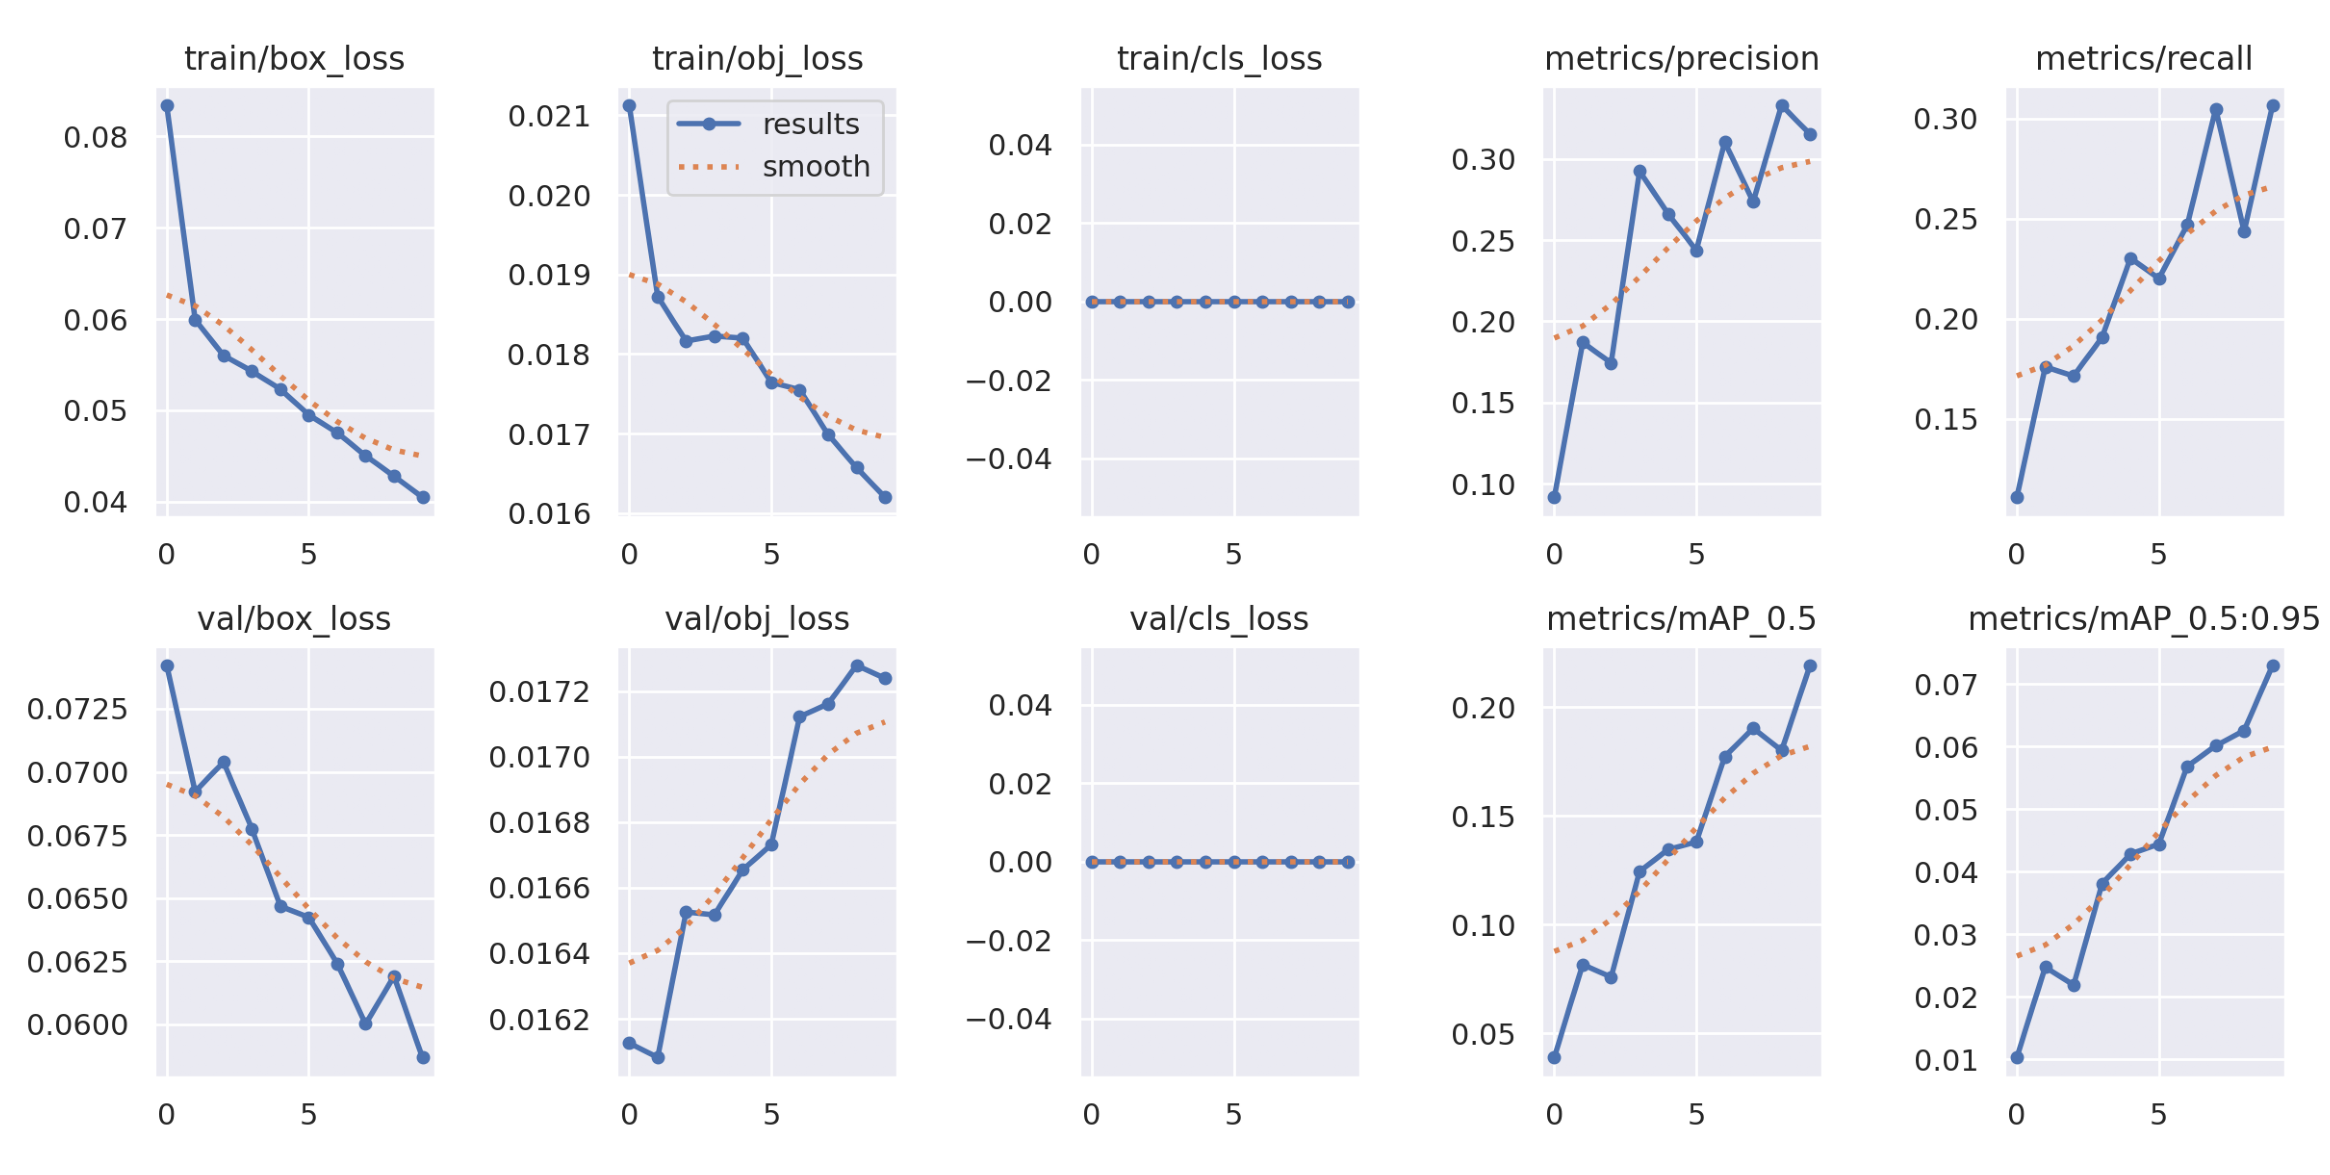

In [ ]:
# Выведем графики обучения модели (укажем путь к картинке в которую сохраняется результат)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5/runs/train/exp2/results.png'))

In [ ]:
# Путь куда сохранялись веса дообученной модели
# Путь к папке с файлами yolo
model_path = '/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5/runs/train/exp2/weights/best.pt'
yolo_path = '/content/drive/MyDrive/Colab Notebooks/ML_System_Design/YOLO5/yolov5'

# Загрузка модели из торч хаб и загрузка в неё ранее сохранённых весов
model = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')

# Путь к тестовым картинкам
path_to_test = "/content/drive/MyDrive/Colab Notebooks/ML_System_Design/data/dentasis_v32i_Caries_v0-v0/test/images/"
test_list = os.listdir(path_to_test)

YOLOv5 🚀 2023-9-25 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


In [ ]:
for image in test_list:
  results = model([path_to_test + image])
  print(results)

image 1/1: 640x640 3 cariess
Speed: 225.7ms pre-process, 101.1ms inference, 2.7ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 1 caries
Speed: 193.0ms pre-process, 30.2ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 1 caries
Speed: 207.1ms pre-process, 30.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 2 cariess
Speed: 295.2ms pre-process, 30.3ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 311.0ms pre-process, 30.2ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 396.3ms pre-process, 30.5ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 (no detections)
Speed: 210.8ms pre-process, 30.2ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x640 1 caries
Speed: 250.0ms pre-process, 30.2ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 640x6

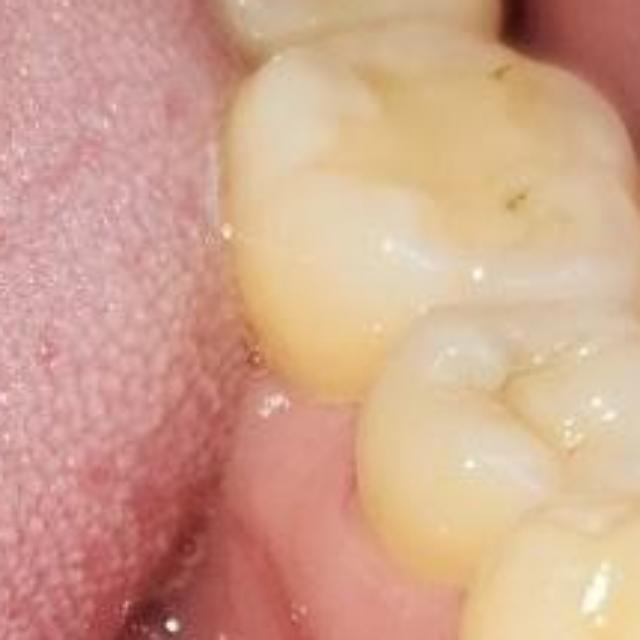

In [ ]:
image = Image.open(path_to_test + test_list[0])
display(image)

In [ ]:
wandb.finish()